In [12]:
%pip install pandas numpy matplotlib seaborn openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Read Excel file
df = pd.read_excel('Online Retail.xlsx')

In [6]:
# 1. Basic Dataset Information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nDuplicate Rows by Column:")
for column in df.columns:
    dupes = df[column].duplicated().sum()
    print(f"{column}: {dupes} duplicates")

Dataset Shape: (541909, 8)

Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data Types:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicate Rows: 5268

Duplicate Rows by Column:
InvoiceNo: 516009 duplicates
StockCode: 537839 duplicates
Description: 537685 duplicates
Quantity: 541187 duplicates
InvoiceDate: 518649 duplicates
UnitPrice: 540279 duplicates
CustomerID: 537536 duplicates
Country: 541871 duplicates


In [7]:
# 2. Descriptive Statistics
print("\nNumerical Columns Summary:\n", df.describe())



Numerical Columns Summary:
             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [8]:
# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nCategorical Columns Summary:")
    for col in categorical_cols:
        print(f"\n{col} value counts:\n", df[col].value_counts())
        print(f"{col} unique values:", df[col].nunique())


Categorical Columns Summary:

InvoiceNo value counts:
 573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
InvoiceNo unique values: 25900

StockCode value counts:
 85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64
StockCode unique values: 4070

Description value counts:
 WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRA

In [18]:
# 3. Data Cleaning Functions
def clean_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Handle missing values
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    
    return df_clean


In [21]:
# 4. Visualization Functions
def plot_distributions(df, numeric_cols):
    """Plot distributions for numeric columns"""
    n_cols = len(numeric_cols)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
    
    for idx, col in enumerate(numeric_cols):
        # Histogram
        sns.histplot(data=df, x=col, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'Distribution of {col}')
        
        # Box plot
        sns.boxplot(data=df, y=col, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()
    
def plot_correlations(df, numeric_cols):
    """Plot correlation matrix for numeric columns"""
    corr_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

In [22]:
# 5. Apply cleaning
df_clean = clean_data(df)

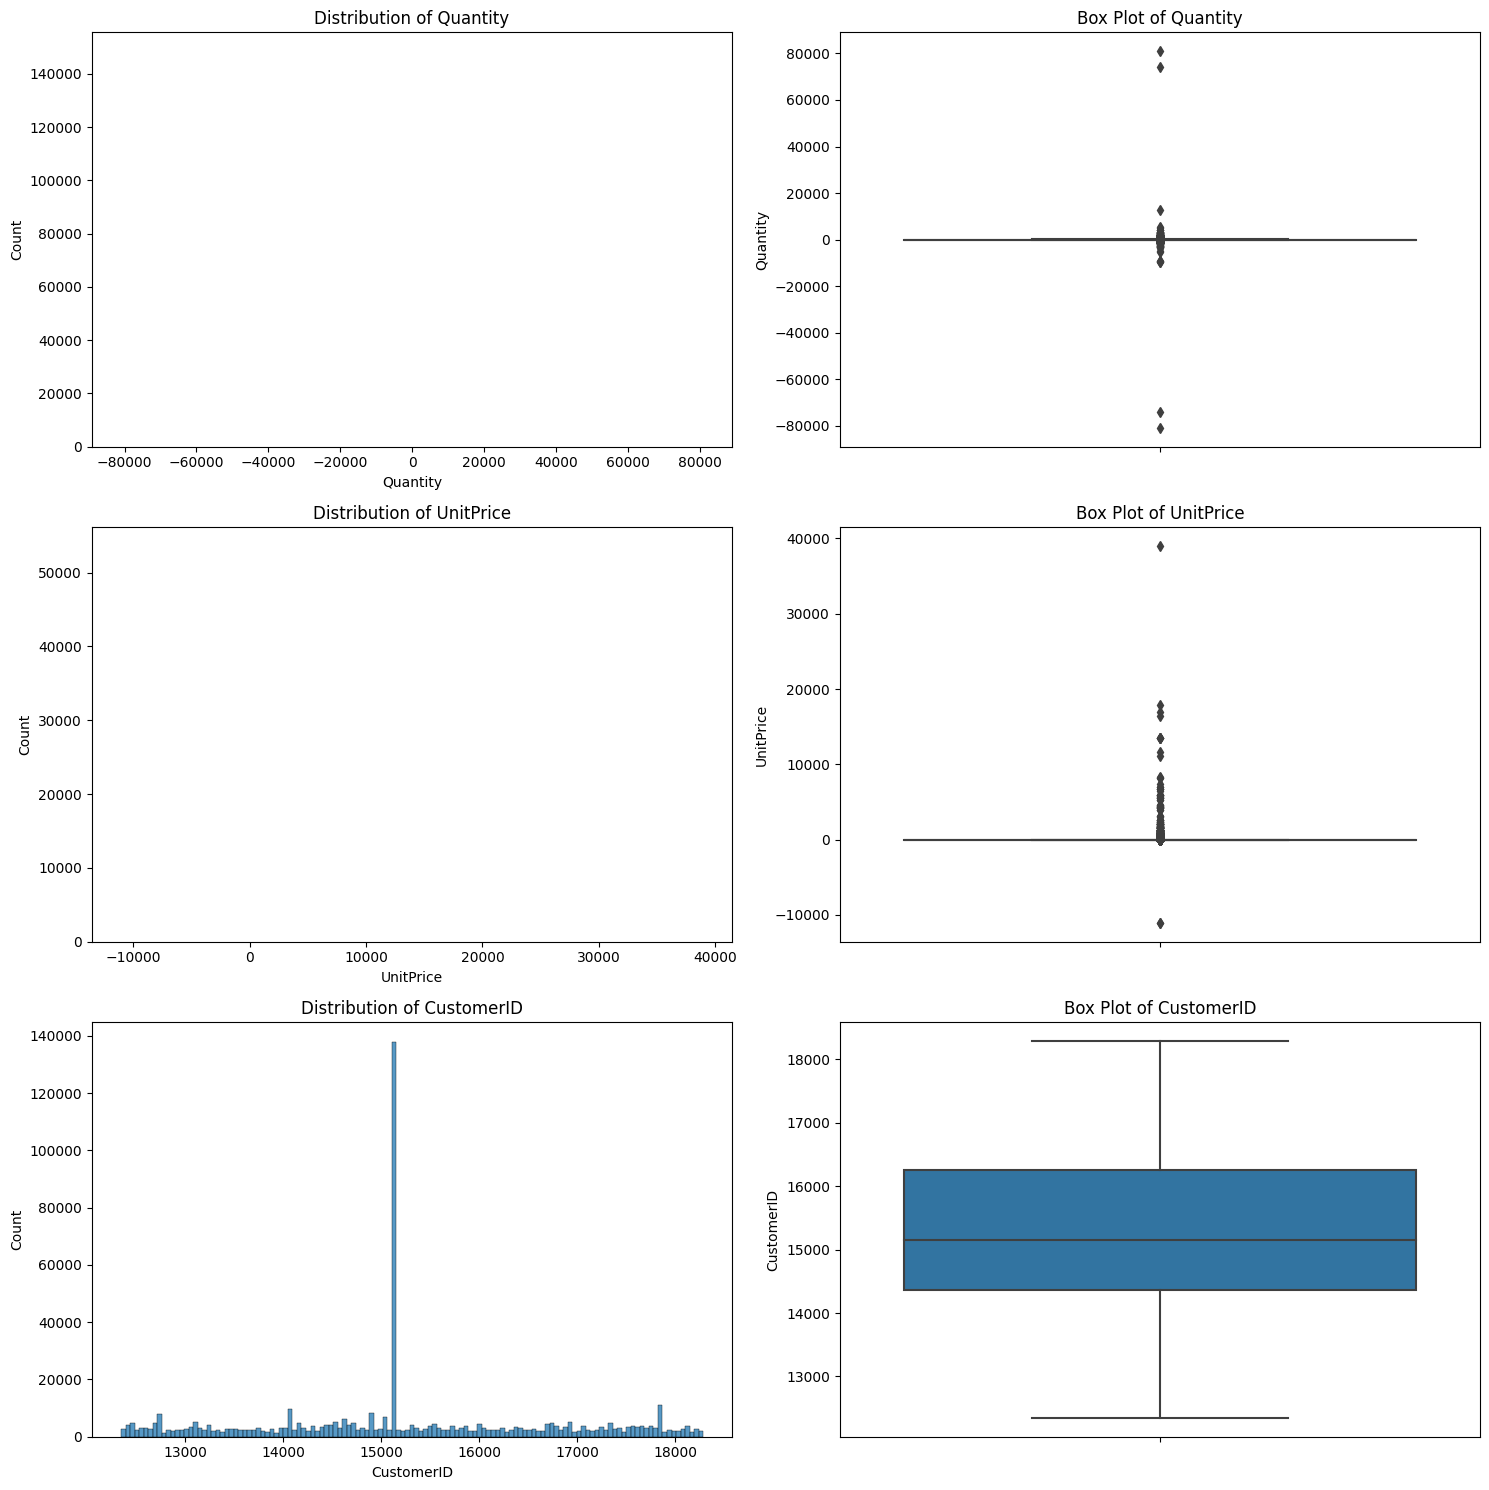

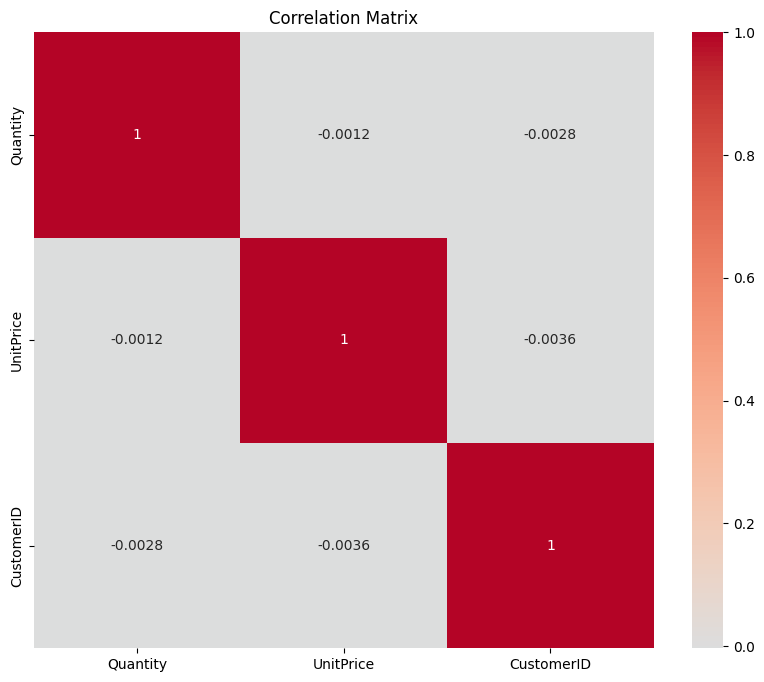

In [23]:
# 6. Generate visualizations
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
plot_distributions(df_clean, numeric_cols)
plot_correlations(df_clean, numeric_cols)

In [29]:
# 7. Basic Statistical Tests
def run_statistical_tests(df, numeric_cols):
    """Perform basic statistical tests"""
    results = {}
    
    # Normality test (Shapiro-Wilk)
    for col in numeric_cols:
        # Sample 1000 values if more than 1000 (Shapiro-Wilk limitation)
        data = df[col].sample(min(1000, len(df))) if len(df) > 1000 else df[col]
        stat, p_value = stats.shapiro(data)
        results[f'{col}_normality'] = {'statistic': stat, 'p_value': p_value}
    
    return results

statistical_results = run_statistical_tests(df_clean, numeric_cols)
print("\nStatistical Test Results:")
for test, result in statistical_results.items():
    print(f"\n{test}:")
    print(f"Statistic: {result['statistic']:.4f}")
    print(f"P-value: {result['p_value']:.4f}")


Statistical Test Results:

Quantity_normality:
Statistic: 0.2112
P-value: 0.0000

UnitPrice_normality:
Statistic: 0.0458
P-value: 0.0000

CustomerID_normality:
Statistic: 0.9608
P-value: 0.0000


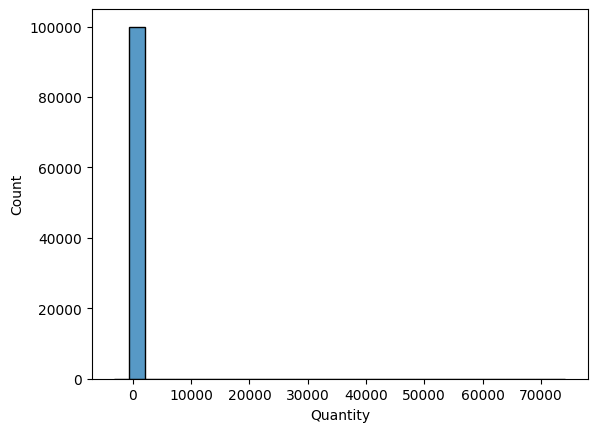

In [31]:
# Quick single column visualization
sns.histplot(data=df_clean.sample(100000), x='Quantity', bins=30)
plt.show()

In [ ]:
# 8. Save cleaned data
# df_clean.to_excel('cleaned_retail_data.xlsx', index=False)
# df_clean.to_csv('cleaned_retail_data.csv', index=False)